## Digit-Recognizer

### Imported package

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

### Importing data

In [138]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

In [139]:
train_df.shape, test_df.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

In [140]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [144]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [145]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [146]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


### Image making by number

In [147]:
number = random.randint(0, 42000) 
number

31718

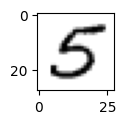

In [148]:
plt.figure(figsize=(1, 1))
plt.imshow(train_df.iloc[number, 1:].values.reshape(28, 28), cmap=plt.cm.binary)

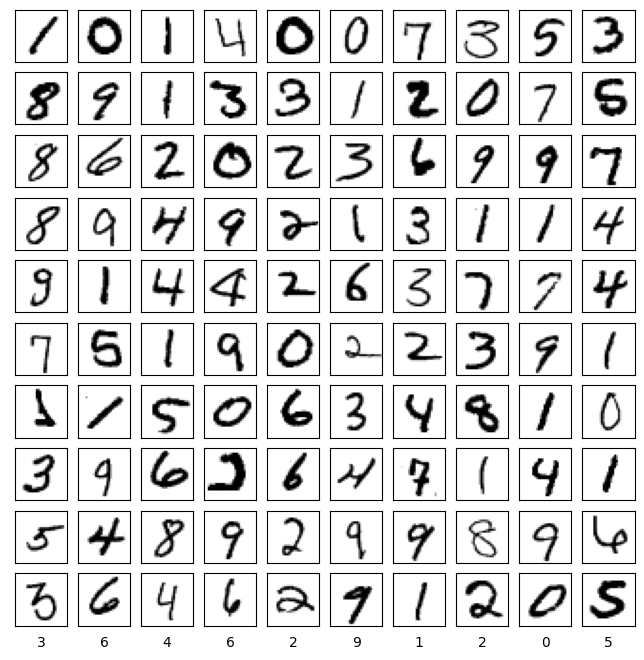

In [257]:
# code to show 100 images
plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_df.iloc[i, 0])

In [155]:
# converting number 0 to 256 to 0 to 1
x_train_df = train_df.iloc[:, 1:].values / 256
x_test_df = test_df.iloc[:, :].values / 256
x_train_df[number]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [156]:
y_train_df = train_df.iloc[:, 0].values
y_train_df[number]

5

In [157]:
x_train_df.shape, x_test_df.shape

((42000, 784), (28000, 784))

In [158]:
x_train_df[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Models

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

In [160]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24609375, 0.98828125,
       0.47265625, 0.        , 0.        , 0.        , 0.     

In [161]:
y_train[0]

6

In [240]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [241]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [242]:
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


1050/1050 [==============================] - 4s 3ms/step - loss: 0.3707 - accuracy: 0.8883 - val_loss: 0.1741 - val_accuracy: 0.9493
Epoch 2/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1358 - accuracy: 0.9585 - val_loss: 0.1306 - val_accuracy: 0.9598
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0930 - accuracy: 0.9716 - val_loss: 0.1164 - val_accuracy: 0.9633
Epoch 4/10
1050/1050 [==============================] - 410s 391ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.1516 - val_accuracy: 0.9569
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.1201 - val_accuracy: 0.9655
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.1472 - val_accuracy: 0.9599
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.1314 - val_accuracy: 0.9656

In [243]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9695
Test Accuracy: 0.9695237874984741


In [245]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.370664,0.888274,0.174141,0.949286
1,0.135840,0.958512,0.130594,0.959762
2,0.093018,0.971607,0.116411,0.963333
3,0.068468,0.978631,0.151612,0.956905
4,0.057514,0.981607,0.120099,0.965476


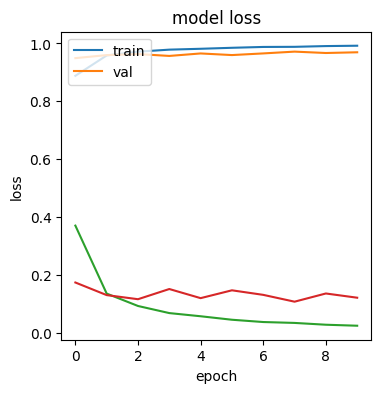

In [246]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [247]:
y_predicted = model.predict(x_test)
y_predicted[0]

263/263 [==============================] - 1s 2ms/step


array([3.2778380e-03, 8.6764073e-01, 3.7517974e-01, 5.0482072e-02,
       5.1539302e-01, 4.9188570e-03, 4.1731200e-04, 4.1498885e-02,
       9.9999565e-01, 3.5321251e-01], dtype=float32)

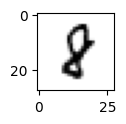

In [248]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)

In [249]:
np.argmax(y_predicted[0])

8

In [250]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [251]:
y_predicted_labels[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [252]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[807,   0,   0,   1,   0,   2,   2,   0,   2,   2],
       [  0, 888,   4,   0,   2,   1,   1,   1,  11,   1],
       [  3,   2, 815,   5,   6,   0,   1,   5,   5,   4],
       [  1,   1,   8, 884,   0,  15,   0,   6,  13,   9],
       [  2,   0,   0,   1, 802,   3,   5,   0,   0,  26],
       [  3,   0,   0,   6,   0, 679,   2,   2,   5,   5],
       [  5,   1,   0,   0,   0,   5, 767,   0,   7,   0],
       [  0,   0,   7,   1,   4,   1,   0, 869,   2,   9],
       [  1,   1,   2,   6,   2,   3,   2,   4, 811,   3],
       [  1,   0,   0,   4,   1,   4,   0,   5,   1, 822]])>

Text(58.222222222222214, 0.5, 'Truth')

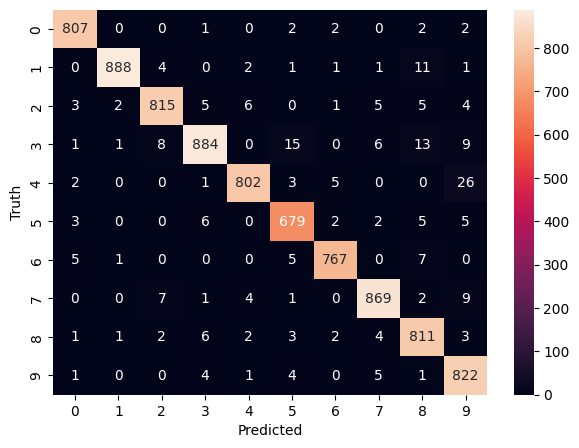

In [256]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')